# Sierra Leone Solar Farm EDA

## Overview
This notebook performs exploratory data analysis (EDA) on the Sierra Leone solar farm dataset.  
We focus on:
- Profiling and cleaning the data
- Outlier detection
- Time-series analysis
- Sensor cleaning impact
- Correlation and relationship analysis
- Wind & distribution visualization
- Temperature & humidity analysis
- Bubble chart visualization
- Summary insights and strategic recommendations


## 0. Setup — Import Libraries & Helper Functions
We import the necessary Python libraries and define helper functions for:
- Loading CSV
- Saving cleaned data locally
- Computing z-scores for outlier detection


In [1]:
# Cell 1 — Setup
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from datetime import datetime

DATA_PATH="../data/sierraleone-bumbuna.csv"
COUNTRY="sierraleone "

plt.rcParams["figure.figsize"] = (12,5)
sns.set(style="whitegrid")

# Helper functions
def load_csv(path):
    return pd.read_csv(path, parse_dates=["Timestamp"])

def save_clean(df, out_path=DATA_PATH):
    df.to_csv(out_path, index=False)
    print(f"Saved cleaned dataset to: {out_path}")

def zscore_df(df, cols):
    return df[cols].apply(lambda col: zscore(col.fillna(col.median())))


## 1. Load Dataset & Initial Profiling
- Load Benin solar dataset
- Inspect shape, head, dtypes
- Summary statistics & missing-value report


In [2]:

df = load_csv(DATA_PATH)

print("Shape:", df.shape)
display(df.head())
display(df.dtypes)

# Summary & missing report
display(df.describe(include="all"))
missing_counts = df.isna().sum()
missing_pct = (missing_counts / len(df)) * 100
print("Columns with >5% missing values:")
display(missing_pct[missing_pct > 5])


Shape: (525600, 19)


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


Timestamp        datetime64[ns]
GHI                     float64
DNI                     float64
DHI                     float64
ModA                    float64
ModB                    float64
Tamb                    float64
RH                      float64
WS                      float64
WSgust                  float64
WSstdev                 float64
WD                      float64
WDstdev                 float64
BP                        int64
Cleaning                  int64
Precipitation           float64
TModA                   float64
TModB                   float64
Comments                float64
dtype: object

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,0.0
mean,2022-04-30 12:00:30.000000768,201.957515,116.376337,113.720571,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091,NaN
min,2021-10-30 00:01:00,-19.500000,-7.800000,-17.900000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000,NaN
25%,2022-01-29 06:00:45,-2.800000,-0.300000,-3.800000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000,NaN
50%,2022-04-30 12:00:30,0.300000,-0.100000,-0.100000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000,NaN
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000,NaN
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000,NaN
std,NaN,298.495150,218.652659,158.946032,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161,NaN


Columns with >5% missing values:


Comments    100.0
dtype: float64

## 2. Clean Column Names & Parse Timestamp
- Standardize column names
- Ensure Timestamp is datetime type
- Sort by Timestamp
- Add derived columns for analysis: date, year, month, hour


In [3]:
df.columns = [c.strip() for c in df.columns]

if not np.issubdtype(df["Timestamp"].dtype, np.datetime64):
    df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

df = df.sort_values("Timestamp").reset_index(drop=True)

df["date"] = df["Timestamp"].dt.date
df["year"] = df["Timestamp"].dt.year
df["month"] = df["Timestamp"].dt.month
df["hour"] = df["Timestamp"].dt.hour

display(df[["Timestamp","date","year","month","hour"]].head())


,Timestamp,date,year,month,hour
0,2021-10-30 00:01:00,2021-10-30,2021,10,0
1,2021-10-30 00:02:00,2021-10-30,2021,10,0
2,2021-10-30 00:03:00,2021-10-30,2021,10,0
3,2021-10-30 00:04:00,2021-10-30,2021,10,0
4,2021-10-30 00:05:00,2021-10-30,2021,10,0


## 3. Summary Statistics & Missing-Value Report
- Compute numeric describe
- Columns with missing values >0%
- Save missing-value report locally


In [4]:
numeric = df.select_dtypes(include=[np.number]).columns.tolist()
display(df[numeric].describe().T)

missing_report = pd.DataFrame({
    "missing_count": df.isna().sum(),
    "missing_pct": (df.isna().sum()/len(df))*100
}).sort_values("missing_pct", ascending=False)

display(missing_report[missing_report["missing_pct"] > 0])
missing_report.to_csv(f"../data/{COUNTRY}_missing_report.csv", index=True)


,count,mean,std,min,25%,50%,75%,max
GHI,525600.0,201.957515,298.495150,-19.5,-2.80,0.3,362.40,1499.0
DNI,525600.0,116.376337,218.652659,-7.8,-0.30,-0.1,107.00,946.0
DHI,525600.0,113.720571,158.946032,-17.9,-3.80,-0.1,224.70,892.0
ModA,525600.0,206.643095,300.896893,0.0,0.00,3.6,359.50,1507.0
ModB,525600.0,198.114691,288.889073,0.0,0.00,3.4,345.40,1473.0
Tamb,525600.0,26.319394,4.398605,12.3,23.10,25.3,29.40,39.9
RH,525600.0,79.448857,20.520775,9.9,68.70,85.4,96.70,100.0
WS,525600.0,1.146113,1.239248,0.0,0.00,0.8,2.00,19.2
WSgust,525600.0,1.691606,1.617053,0.0,0.00,1.6,2.60,23.9
WSstdev,525600.0,0.363823,0.295000,0.0,0.00,0.4,0.60,4.1


,missing_count,missing_pct
Comments,525600,100.0


## 4. Outlier Detection
- Compute Z-scores for: GHI, DNI, DHI, ModA, ModB, WS, WSgust
- Flag rows with |Z| > 3


In [5]:
outlier_cols = ["GHI","DNI","DHI","ModA","ModB","WS","WSgust"]
outlier_cols = [c for c in outlier_cols if c in df.columns]

z_df = zscore_df(df, outlier_cols)
outlier_mask = (z_df.abs() > 3).any(axis=1)
outliers = df[outlier_mask]

print("Number of outlier rows detected:", outliers.shape[0])
display(outliers.head(10))


Number of outlier rows detected: 16292


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,BP,Cleaning,Precipitation,TModA,TModB,Comments,date,year,month,hour
653,2021-10-30 10:54:00,814.0,257.0,594.3,878.0,856.0,25.9,85.3,0.5,1.1,...,1002,0,0.0,50.4,45.6,NaN,2021-10-30,2021,10,10
654,2021-10-30 10:55:00,826.0,263.5,599.6,883.0,861.0,26.0,85.4,1.7,2.4,...,1002,0,0.0,51.6,46.6,NaN,2021-10-30,2021,10,10
655,2021-10-30 10:56:00,851.0,285.0,605.9,912.0,890.0,26.0,84.2,1.6,2.1,...,1002,0,0.0,52.4,47.0,NaN,2021-10-30,2021,10,10
656,2021-10-30 10:57:00,823.0,254.8,603.9,878.0,856.0,26.0,85.3,0.8,1.6,...,1002,0,0.0,53.4,47.7,NaN,2021-10-30,2021,10,10
657,2021-10-30 10:58:00,810.0,244.5,598.8,864.0,843.0,26.1,85.7,0.6,1.6,...,1002,0,0.0,54.6,48.6,NaN,2021-10-30,2021,10,10
662,2021-10-30 11:03:00,1071.0,616.0,539.1,1142.0,1116.0,26.4,82.5,0.2,0.7,...,1002,0,0.0,59.3,51.8,NaN,2021-10-30,2021,10,11
663,2021-10-30 11:04:00,1119.0,673.5,538.4,1193.0,1167.0,26.3,83.1,0.1,1.1,...,1002,0,0.0,60.5,53.2,NaN,2021-10-30,2021,10,11
670,2021-10-30 11:11:00,1092.0,667.1,507.6,1163.0,1137.0,27.0,83.4,2.0,2.6,...,1002,0,0.0,66.3,59.8,NaN,2021-10-30,2021,10,11
671,2021-10-30 11:12:00,1154.0,755.7,491.3,1237.0,1208.0,27.0,82.4,1.2,1.9,...,1002,0,0.0,66.1,59.2,NaN,2021-10-30,2021,10,11
672,2021-10-30 11:13:00,1063.0,665.2,478.0,1132.0,1105.0,27.1,80.1,0.6,1.6,...,1002,0,0.0,66.0,58.5,NaN,2021-10-30,2021,10,11


## 5. Cleaning Strategy: Impute & Winsorize
- Impute missing numeric values with median
- Winsorize extreme values to 1st/99th percentile


In [6]:
clean_df = df.copy()
num_cols = numeric
# Note: You need to ensure 'outlier_cols' is defined before this section runs.

# 1. Impute Missing Numeric Data Safely
for c in num_cols:
    # Check 1: If the column has ANY missing values
    if clean_df[c].isna().any():
        
        # Check 2 (Fixes RuntimeWarning): Only calculate median if there are non-NaN values
        if clean_df[c].notna().any():
            median_val = clean_df[c].median()
            
            # Safe Imputation (Fixes FutureWarning): Use .loc to assign result back
            clean_df.loc[:, c] = clean_df.loc[:, c].fillna(median_val)
        else:
            # Handle cases where the whole column is NaN (e.g., fill with 0 or skip)
            print(f"Warning: Column '{c}' is entirely NaN and was skipped for median imputation.")


# 2. Outlier Handling (Clipping) Safely
for c in outlier_cols:
    low = clean_df[c].quantile(0.01)
    high = clean_df[c].quantile(0.99)
    
    # Safe Clipping (Fixes FutureWarning): Use .loc to assign clipped values back
    clean_df.loc[:, c] = clean_df.loc[:, c].clip(lower=low, upper=high)

# Final steps
z_df_post = zscore_df(clean_df, outlier_cols)
print("Outliers after cleaning:", (z_df_post.abs() > 3).any(axis=1).sum())

Outliers after cleaning: 8052


## 6. Export Cleaned Dataset
- Save cleaned data locally 


In [7]:
save_clean(clean_df, out_path=f"../data/{COUNTRY}_clean.csv")

Saved cleaned dataset to: ../data/sierraleone _clean.csv


## 7. Time Series Analysis
- Daily mean irradiance
- Hourly average patterns
- Monthly boxplots


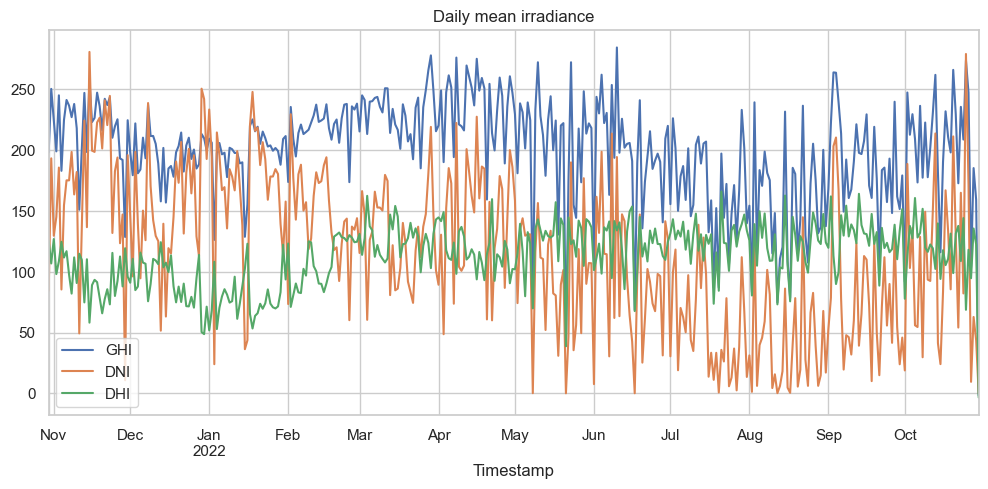

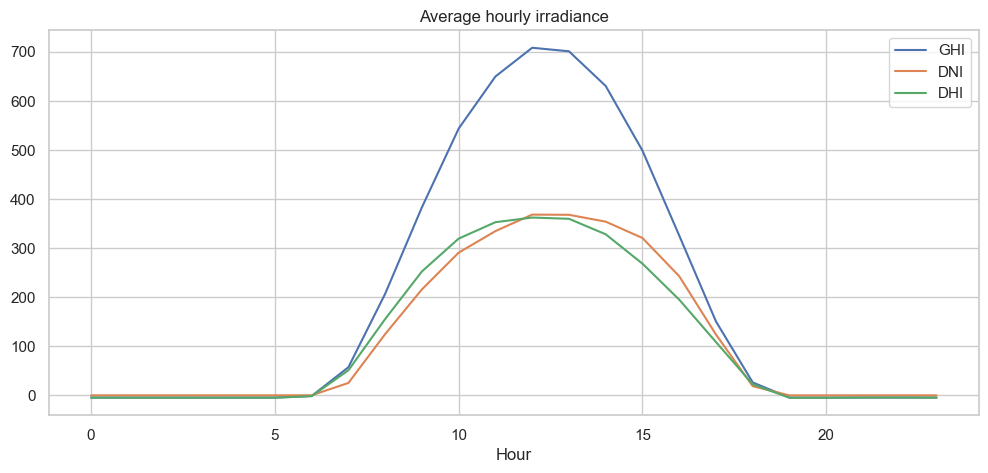

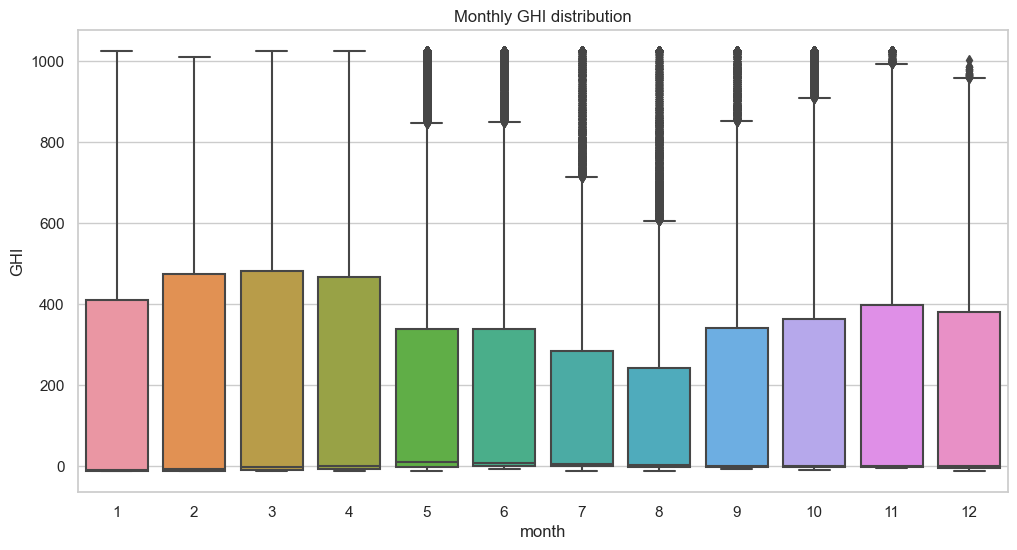

In [8]:
ts = clean_df.set_index("Timestamp")
daily = ts[["GHI","DNI","DHI","Tamb"]].resample("D").mean()
daily[["GHI","DNI","DHI"]].plot(title="Daily mean irradiance")
plt.show()

hourly = ts[["GHI","DNI","DHI"]].groupby(ts.index.hour).mean()
hourly.plot(title="Average hourly irradiance")
plt.xlabel("Hour")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x="month", y="GHI", data=clean_df)
plt.title("Monthly GHI distribution")
plt.show()


## 8. Cleaning Impact Analysis
- Compare ModA & ModB pre/post cleaning events


ModA                       ModB                
                mean median   count        mean  median   count
Cleaning                                                       
0         205.789812    3.5  525092  197.237090    3.30  525092
1         273.309252  240.3     508  277.231102  247.55     508

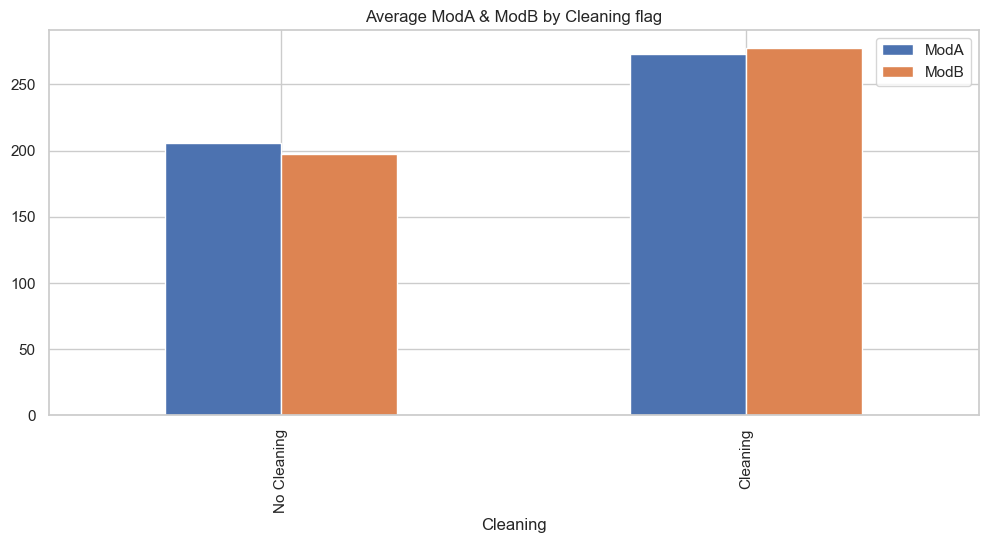

In [9]:
if "Cleaning" in clean_df.columns:
    grp = clean_df.groupby("Cleaning")[["ModA","ModB"]].agg(["mean","median","count"])
    display(grp)
    means = clean_df.groupby("Cleaning")[["ModA","ModB"]].mean().reset_index()
    means.plot(x="Cleaning", kind="bar", stacked=False, title="Average ModA & ModB by Cleaning flag")
    plt.xticks(ticks=[0,1], labels=["No Cleaning","Cleaning"])
    plt.show()


## 9. Correlation & Relationship Analysis
- Correlation heatmap
- Scatter plots: WS vs GHI, RH vs Tamb/GHI


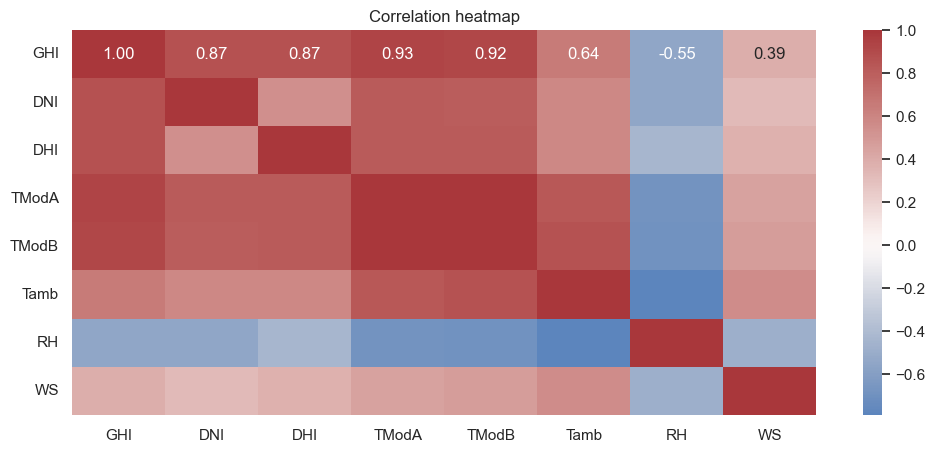

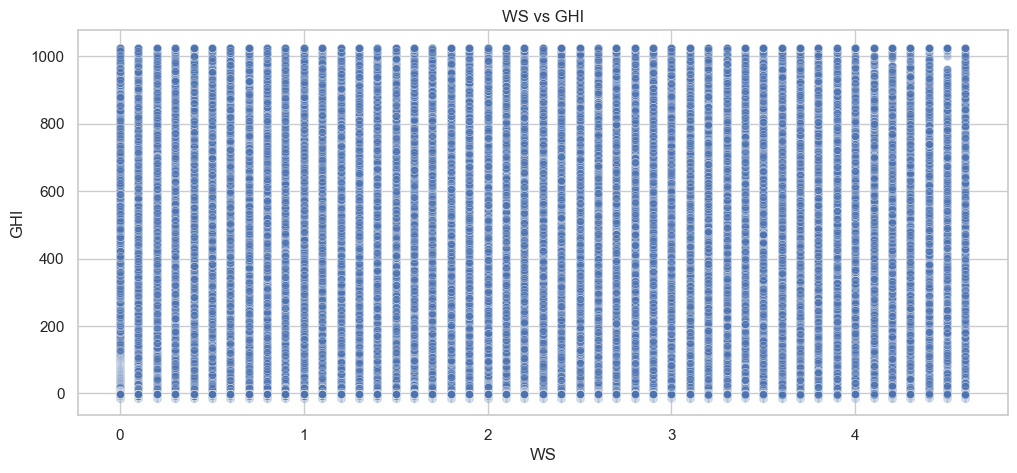

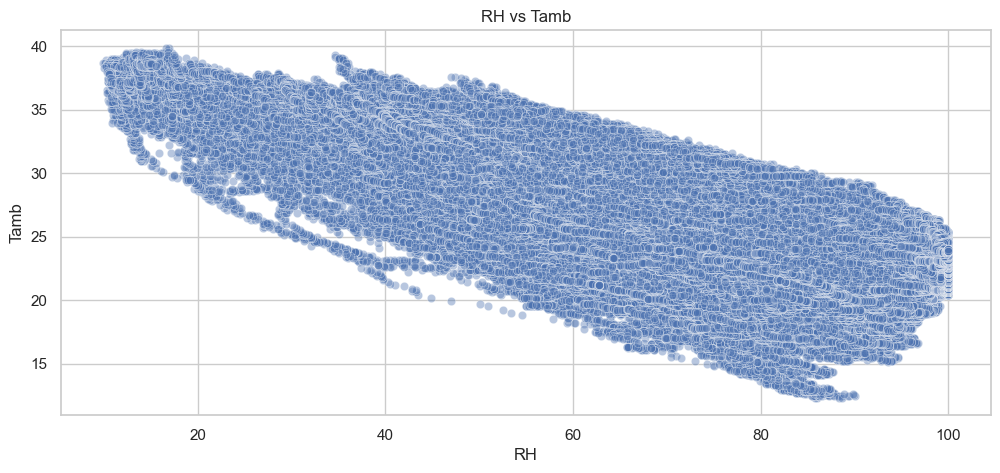

In [10]:
corr_cols = [c for c in ["GHI","DNI","DHI","TModA","TModB","Tamb","RH","WS"] if c in clean_df.columns]
sns.heatmap(clean_df[corr_cols].corr(), annot=True, fmt=".2f", cmap="vlag", center=0)
plt.title("Correlation heatmap")
plt.show()

sns.scatterplot(x="WS", y="GHI", data=clean_df, alpha=0.4)
plt.title("WS vs GHI")
plt.show()

sns.scatterplot(x="RH", y="Tamb", data=clean_df, alpha=0.4)
plt.title("RH vs Tamb")
plt.show()


## 10. Wind & Distribution Analysis
- Histograms for GHI and WS
- Simple wind rose (polar chart)

C:\Users\yoga\Desktop\10academy\solar-challenge-week0\.venv\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


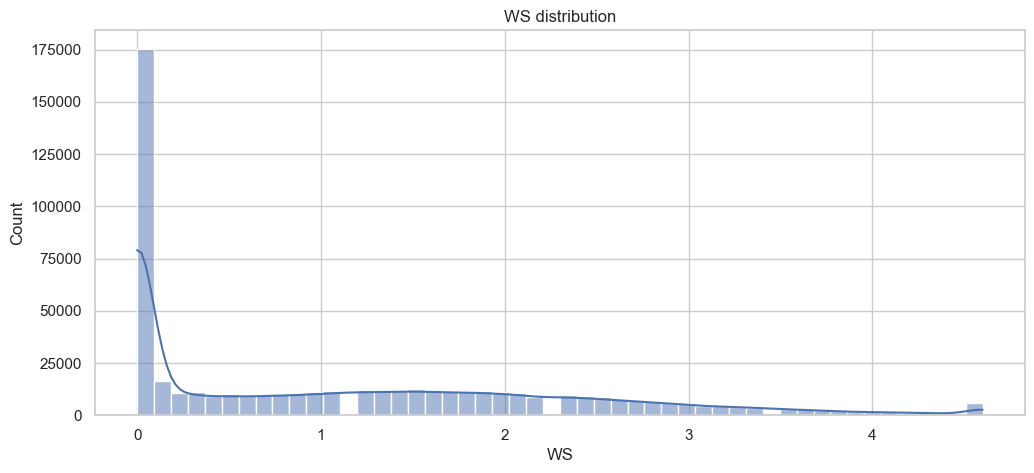

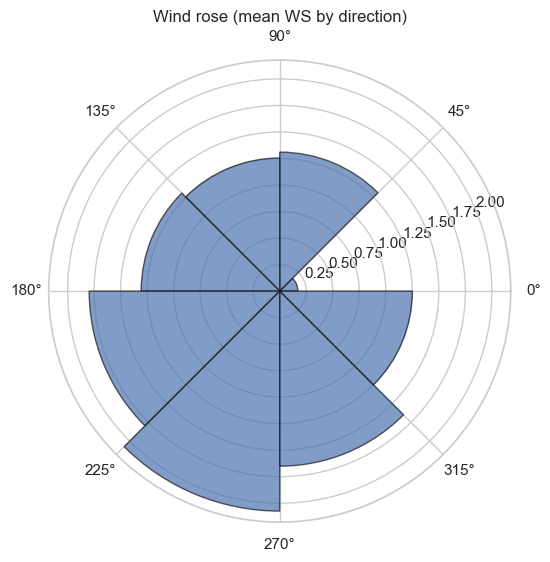

In [11]:
# WS Histogram
sns.histplot(clean_df["WS"].dropna(), bins=50, kde=True)
plt.title("WS distribution")
plt.show()

# --- Wind Rose ---
if "WD" in clean_df.columns and "WS" in clean_df.columns:
    
    # 1. Safely handle NaNs for calculation
    # Only select rows where WD is not NaN. This ensures WD and WS alignment.
    df_rose = clean_df.loc[clean_df["WD"].notna(), ["WD", "WS"]].copy()

    # 2. Conversion and Binning (WD must not contain NaNs after the selection above)
    wd = np.deg2rad(df_rose["WD"])
    ws = df_rose["WS"]
    
    bins = np.linspace(0, 2*np.pi, 9)
    # The -1 corrects the index because numpy.digitize returns indices [1, 8]
    inds = np.digitize(wd, bins) - 1 
    
    # 3. Calculate mean WS per direction bin safely
    # Check if a bin has any data before taking the mean, to prevent errors if a bin is empty.
    rose_means = [ws[inds==i].mean() if len(ws[inds==i].dropna()) > 0 else 0 
                  for i in range(len(bins)-1)]
    
    # 4. Plotting
    angles = (bins[:-1] + bins[1:])/2
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111, polar=True)
    ax.bar(angles, rose_means, width=(2*np.pi)/8, bottom=0, edgecolor='k', alpha=0.7)
    ax.set_title("Wind rose (mean WS by direction)")
    plt.show()


## 11. Temperature & Humidity Analysis
- RH vs Tamb
- RH vs GHI


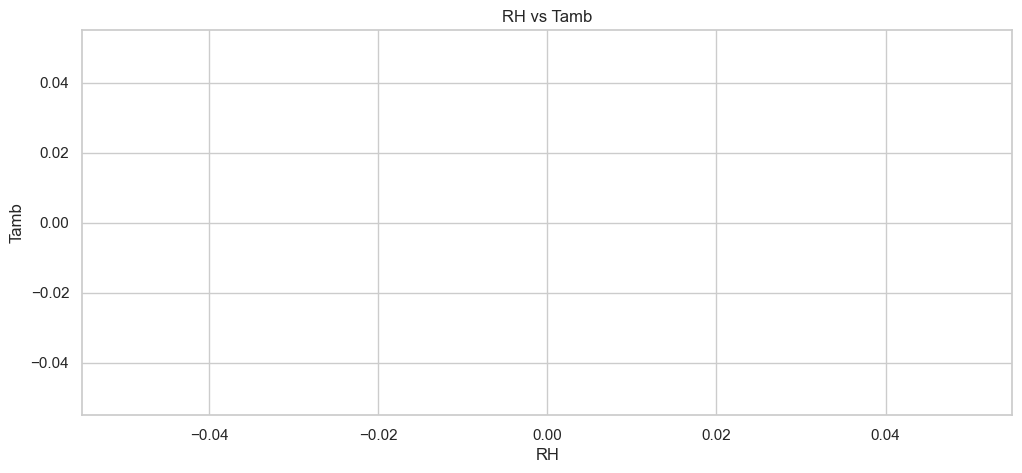

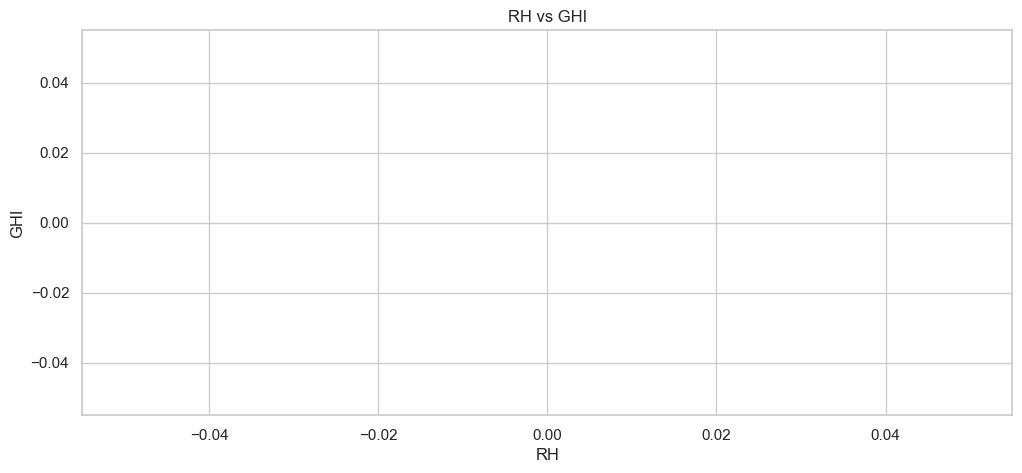

In [12]:
sns.regplot(x="RH", y="Tamb", data=clean_df.sample(frac=0.2).dropna(), scatter_kws={"s":10, "alpha":0.4})
plt.title("RH vs Tamb")
plt.show()

sns.regplot(x="RH", y="GHI", data=clean_df.sample(frac=0.2).dropna(), scatter_kws={"s":10, "alpha":0.4})
plt.title("RH vs GHI")
plt.show()


## 12. Bubble Chart
- GHI vs Tamb with bubble size proportional to RH or BP


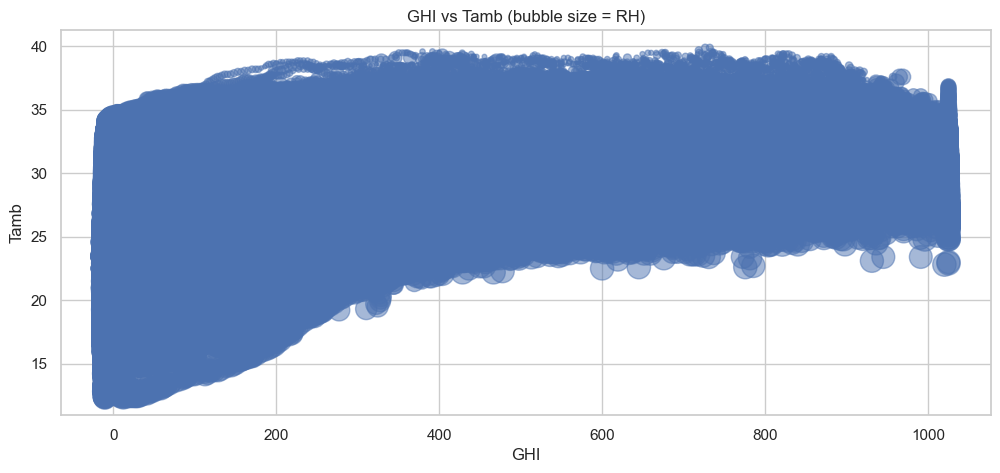

In [13]:
size_col = "RH" if "RH" in clean_df.columns else ("BP" if "BP" in clean_df.columns else None)
if size_col:
    s = (clean_df[size_col].fillna(clean_df[size_col].median()) - clean_df[size_col].min() + 1)
    s = (s / s.max()) * 300
    plt.scatter(clean_df["GHI"], clean_df["Tamb"], s=s, alpha=0.5)
    plt.xlabel("GHI")
    plt.ylabel("Tamb")
    plt.title(f"GHI vs Tamb (bubble size = {size_col})")
    plt.show()
